开始逻辑回归训练...
=== 逻辑回归快速训练流程 ===

1. 加载融合特征...
训练集: (3600, 512)
验证集: (400, 512)
训练标签分布: [1074  377 2149]
验证标签分布: [119  42 239]

2. 训练逻辑回归模型...
=== 逻辑回归训练 ===
检测到 3 个类别
训练集形状: (3600, 512)
标签分布: [1074  377 2149]

开始训练模型...


训练进度: 100%|██████████████████████████████| 100/100 [00:00<00:00, 209.21it/s]



逻辑回归模型训练成功！
训练耗时: 0.48 秒

模型参数:
  求解器: lbfgs
  正则化强度(C): 1.0
  最大迭代次数: 1000
  类别权重: balanced
  多分类策略: multinomial

验证集 评估结果
准确率: 0.6675
加权F1分数: 0.6758
宏平均F1分数: 0.5671
微平均F1分数: 0.6675

分类报告:
              precision  recall  f1-score   support
0                0.6281  0.6387    0.6333  119.0000
1                0.2679  0.3571    0.3061   42.0000
2                0.7892  0.7364    0.7619  239.0000
accuracy         0.6675  0.6675    0.6675    0.6675
macro avg        0.5617  0.5774    0.5671  400.0000
weighted avg     0.6866  0.6675    0.6758  400.0000

逻辑回归训练成功！

3. 可视化训练结果...

生成训练结果可视化...


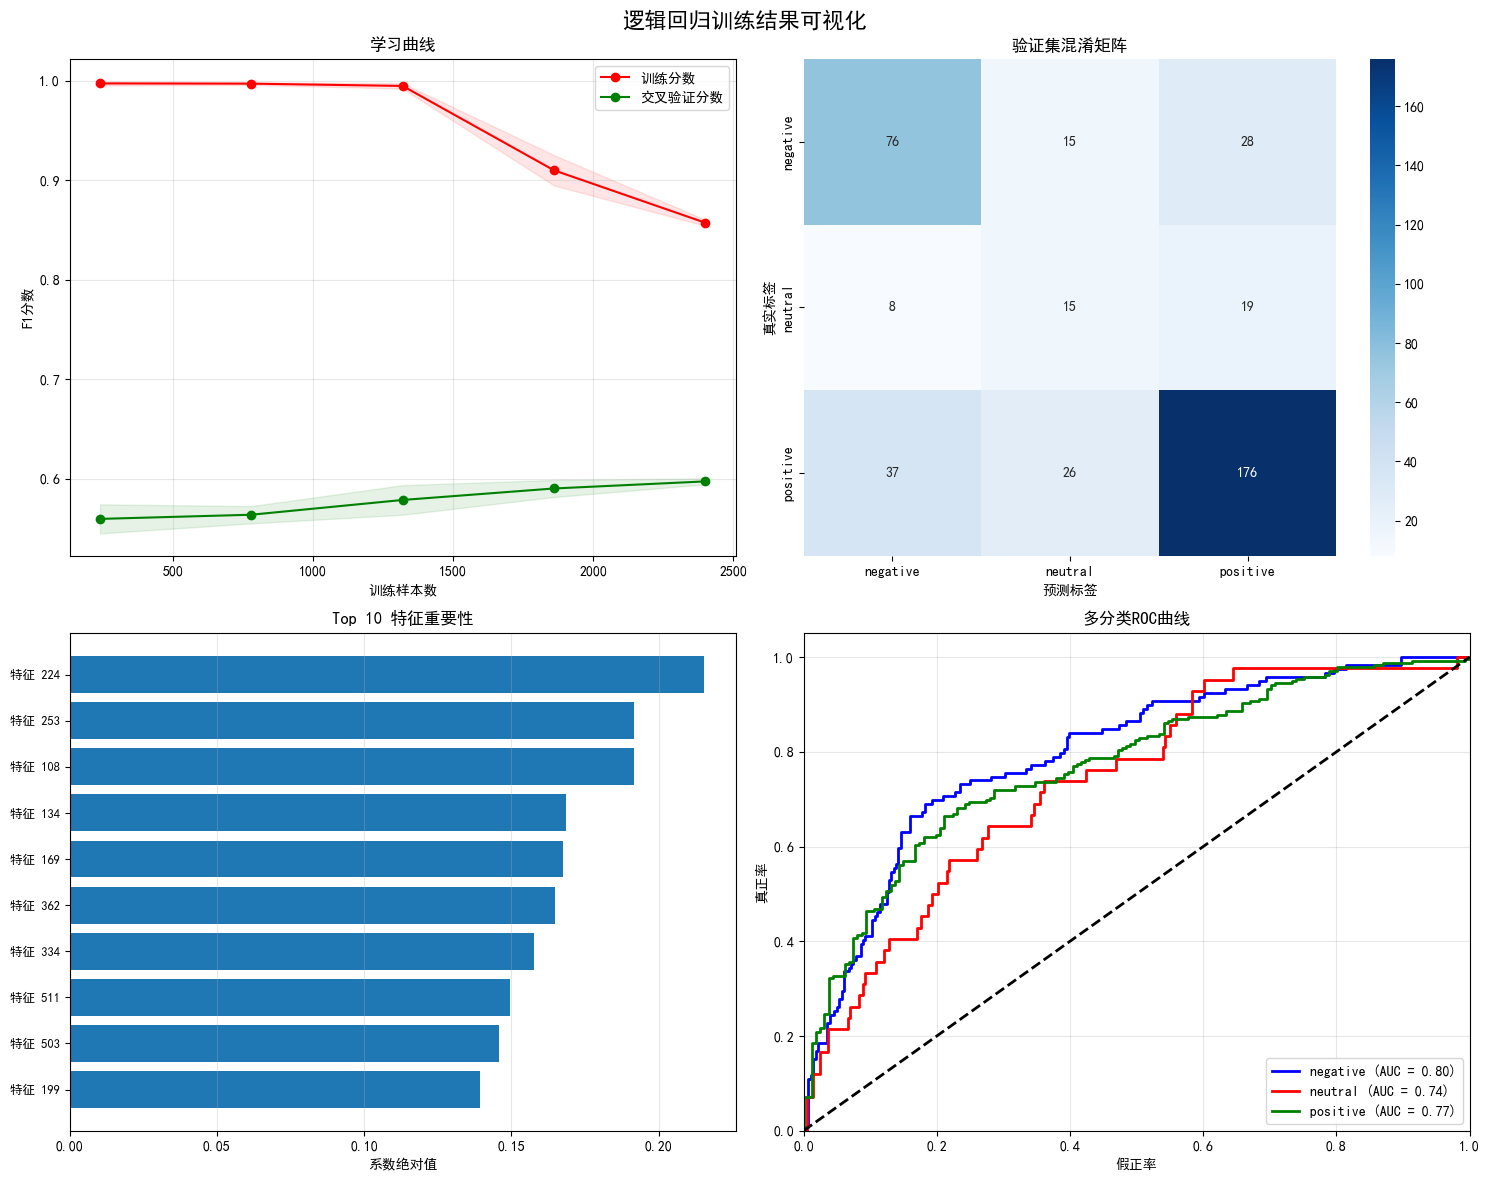

=== 模型性能总结 ===
模型系数形状: (3, 512)
特征数量: 512
实际迭代次数: [210]
训练时间: 0.48 秒

4. 保存模型...

模型已保存到: ./data/models/logistic_regression.pkl
模型摘要已保存到: ./data/models/logistic_regression_summary.txt

5. 最终评估结果...

最终验证集 评估结果
准确率: 0.6675
加权F1分数: 0.6758
宏平均F1分数: 0.5671
微平均F1分数: 0.6675

分类报告:
              precision  recall  f1-score   support
0                0.6281  0.6387    0.6333  119.0000
1                0.2679  0.3571    0.3061   42.0000
2                0.7892  0.7364    0.7619  239.0000
accuracy         0.6675  0.6675    0.6675    0.6675
macro avg        0.5617  0.5774    0.5671  400.0000
weighted avg     0.6866  0.6675    0.6758  400.0000
逻辑回归快速训练流程完成!
总训练时间: 0.48 秒

训练完成，模型已保存。


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import warnings
import os
import joblib
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

class LogisticRegressionTrainer:
    """逻辑回归训练器"""
    
    def __init__(self, random_state=42):
        """
        初始化逻辑回归训练器
        """
        self.random_state = random_state
        self.best_model = None
        self.training_time = None
        
    def train_fast(self, X_train, y_train, X_val=None, y_val=None):
        """
        训练逻辑回归模型）
        
        参数:
        X_train, y_train: 训练数据和标签
        X_val, y_val: 验证数据和标签（可选）
        """
        print("=== 逻辑回归训练 ===")
        
        start_time = time.time()
        
        # 获取类别数量
        n_classes = len(np.unique(y_train))
        print(f"检测到 {n_classes} 个类别")
        print(f"训练集形状: {X_train.shape}")
        print(f"标签分布: {np.bincount(y_train)}")
        
        solver = 'lbfgs'
        multi_class = 'multinomial'

        # 创建并训练模型（使用固定参数）
        print("\n开始训练模型...")

        with tqdm(total=100, desc="训练进度", ncols=80) as pbar:
            # 创建模型
            model = LogisticRegression(
                solver=solver,
                multi_class=multi_class,
                C=1.0,  # 固定正则化强度
                max_iter=1000,  # 减少迭代次数以加快训练
                random_state=self.random_state,
                class_weight='balanced'  # 处理类别不平衡
            )
                
            # 训练模型
            model.fit(X_train, y_train)
            pbar.update(100)  # 完成后更新到100%
        
        # 保存模型
        self.best_model = model
        
        # 计算训练时间
        self.training_time = time.time() - start_time
        
        print(f"\n逻辑回归模型训练成功！")
        print(f"训练耗时: {self.training_time:.2f} 秒")
        
        # 显示模型参数
        print(f"\n模型参数:")
        print(f"  求解器: {solver}")
        print(f"  正则化强度(C): 1.0")
        print(f"  最大迭代次数: 1000")
        print(f"  类别权重: balanced")
        print(f"  多分类策略: {multi_class}")
        
        # 在验证集上评估
        val_metrics = self.evaluate_model(X_val, y_val, set_name="验证集")
        
        return self.best_model
    
    def evaluate_model(self, X, y, set_name="测试集"):
        """评估模型性能"""
        y_pred = self.best_model.predict(X)
        y_pred_proba = self.best_model.predict_proba(X) if hasattr(self.best_model, 'predict_proba') else None
        
        # 计算评估指标
        accuracy = accuracy_score(y, y_pred)
        f1_weighted = f1_score(y, y_pred, average='weighted')
        f1_macro = f1_score(y, y_pred, average='macro')
        f1_micro = f1_score(y, y_pred, average='micro')
        
        # 分类报告
        report = classification_report(y, y_pred, output_dict=True)
        
        print(f"\n{'='*60}")
        print(f"{set_name} 评估结果")
        print(f"{'='*60}")
        print(f"准确率: {accuracy:.4f}")
        print(f"加权F1分数: {f1_weighted:.4f}")
        print(f"宏平均F1分数: {f1_macro:.4f}")
        print(f"微平均F1分数: {f1_micro:.4f}")
        
        # 显示详细分类报告
        print(f"\n分类报告:")
        report_df = pd.DataFrame(report).transpose()
        print(report_df[['precision', 'recall', 'f1-score', 'support']].round(4))
        
        # 混淆矩阵
        cm = confusion_matrix(y, y_pred)
        
        metrics = {
            'accuracy': accuracy,
            'f1_weighted': f1_weighted,
            'f1_macro': f1_macro,
            'f1_micro': f1_micro,
            'predictions': y_pred,
            'probabilities': y_pred_proba,
            'report': report,
            'confusion_matrix': cm
        }
        
        return metrics
    
    def visualize_training_results(self, X_train, y_train, X_val=None, y_val=None):
        """可视化训练结果"""
        print("\n生成训练结果可视化...")
        
        # 创建可视化画布
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('逻辑回归训练结果可视化', fontsize=16, fontweight='bold')
        
        # 1. 学习曲线
        self._plot_learning_curve(X_train, y_train, axes[0, 0])
        
        # 2. 验证集混淆矩阵
        self._plot_confusion_matrix(X_val, y_val, axes[0, 1], title="验证集混淆矩阵")
        
        # 3. 特征系数重要性（如果是线性模型）
        self._plot_feature_coefficients(axes[1, 0])
        
        # 4. ROC曲线（多分类）
        self._plot_roc_curve(X_val, y_val, axes[1, 1])
        
        plt.tight_layout()
        plt.savefig('./data/splits/logistic_regression_results.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        # 显示模型性能总结
        self._display_model_summary()
    
    def _plot_learning_curve(self, X_train, y_train, ax):
        """绘制学习曲线"""
        from sklearn.model_selection import learning_curve
        
        # 使用更少的训练样本比例以加快计算
        train_sizes, train_scores, test_scores = learning_curve(
            self.best_model, X_train, y_train,
            cv=3, scoring='f1_weighted',
            train_sizes=np.linspace(0.1, 1.0, 5),
            n_jobs=1
        )
        
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        
        ax.fill_between(train_sizes, 
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.1, color='r')
        ax.fill_between(train_sizes,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.1, color='g')
        ax.plot(train_sizes, train_scores_mean, 'o-', color='r',
               label='训练分数')
        ax.plot(train_sizes, test_scores_mean, 'o-', color='g',
               label='交叉验证分数')
        ax.set_xlabel('训练样本数')
        ax.set_ylabel('F1分数')
        ax.set_title('学习曲线')
        ax.legend(loc='best')
        ax.grid(True, alpha=0.3)
    
    def _plot_confusion_matrix(self, X, y, ax, title="混淆矩阵"):
        """绘制混淆矩阵"""
        y_pred = self.best_model.predict(X)
        cm = confusion_matrix(y, y_pred)
        
        # 获取类别标签
        classes = np.unique(y)
        class_labels = ['negative', 'neutral', 'positive'][:len(classes)]
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=class_labels,
                   yticklabels=class_labels,
                   ax=ax)
        ax.set_title(title)
        ax.set_xlabel('预测标签')
        ax.set_ylabel('真实标签')
    
    def _plot_feature_coefficients(self, ax):
        """绘制特征系数重要性"""
        if hasattr(self.best_model, 'coef_'):
            coef = self.best_model.coef_
            
            # 计算每个特征的绝对系数平均值
            importance = np.mean(np.abs(coef), axis=0)

            
            # 取最重要的10个特征
            top_n = min(10, len(importance))
            top_indices = np.argsort(importance)[-top_n:]
            top_importance = importance[top_indices]
            
            # 创建特征名称
            feature_names = [f'特征 {i}' for i in top_indices]
            
            ax.barh(range(top_n), top_importance)
            ax.set_yticks(range(top_n))
            ax.set_yticklabels(feature_names, fontsize=9)
            ax.set_xlabel('系数绝对值')
            ax.set_title(f'Top {top_n} 特征重要性')
            ax.grid(True, alpha=0.3, axis='x')
        else:
            ax.text(0.5, 0.5, '模型无系数属性', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title('特征重要性')
    
    def _plot_roc_curve(self, X, y, ax):
        """绘制ROC曲线"""
        if hasattr(self.best_model, 'predict_proba'):
            y_prob = self.best_model.predict_proba(X)
            
            # 二值化标签
            classes = np.unique(y)
            y_bin = label_binarize(y, classes=classes)
            n_classes = y_bin.shape[1]
            
            # 计算每个类别的ROC曲线
            fpr = dict()
            tpr = dict()
            roc_auc = dict()
            
            for i in range(n_classes):
                fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])
            
            # 绘制ROC曲线
            colors = ['blue', 'red', 'green', 'orange', 'purple'][:n_classes]
            class_labels = ['negative', 'neutral', 'positive']
            
            for i, color in zip(range(n_classes), colors):
                label = f'类别 {classes[i]}'
                if i < len(class_labels):
                    label = class_labels[i]
                ax.plot(fpr[i], tpr[i], color=color, lw=2,
                       label=f'{label} (AUC = {roc_auc[i]:.2f})')
            
            ax.plot([0, 1], [0, 1], 'k--', lw=2)
            ax.set_xlim([0.0, 1.0])
            ax.set_ylim([0.0, 1.05])
            ax.set_xlabel('假正率')
            ax.set_ylabel('真正率')
            ax.set_title('多分类ROC曲线')
            ax.legend(loc='lower right')
            ax.grid(True, alpha=0.3)
    
    def _display_model_summary(self):
        """显示模型性能总结"""
        print("=== 模型性能总结 ===")
        
        if hasattr(self.best_model, 'coef_'):
            coef = self.best_model.coef_
            print(f"模型系数形状: {coef.shape}")
            print(f"特征数量: {coef.shape[1]}")
        
        if hasattr(self.best_model, 'n_iter_'):
            print(f"实际迭代次数: {self.best_model.n_iter_}")
        
        print(f"训练时间: {self.training_time:.2f} 秒")
    
    def save_model(self, model_name='logistic_regression'):
        """保存训练好的模型"""
        os.makedirs('./data/models', exist_ok=True)
        model_path = f'./data/models/{model_name}.pkl'
        
        # 保存模型和元数据
        model_data = {
            'model': self.best_model,
            'training_time': self.training_time
        }
        
        joblib.dump(model_data, model_path)
        print(f"\n模型已保存到: {model_path}")
        
        # 保存模型摘要
        summary_path = f'./data/models/{model_name}_summary.txt'
        with open(summary_path, 'w', encoding='utf-8') as f:
            f.write(self._generate_model_summary())
        
        print(f"模型摘要已保存到: {summary_path}")
    
    def _generate_model_summary(self):
        """生成模型摘要"""
        # 获取模型信息
        n_iter = self.best_model.n_iter_ if hasattr(self.best_model, 'n_iter_') else 'N/A'
        coef_shape = self.best_model.coef_.shape if hasattr(self.best_model, 'coef_') else 'N/A'
        
        summary = f"""
=== 逻辑回归快速训练模型摘要 ===

训练时间: {time.strftime('%Y-%m-%d %H:%M:%S')}
训练耗时: {self.training_time:.2f} 秒

数据集信息:
  特征维度: {coef_shape[1] if isinstance(coef_shape, tuple) and len(coef_shape) > 1 else 'N/A'}
  类别数量: {len(self.best_model.classes_) if hasattr(self.best_model, 'classes_') else 'N/A'}

模型配置:
  求解器: {self.best_model.get_params().get('solver', 'N/A')}
  正则化强度(C): {self.best_model.get_params().get('C', 'N/A')}
  最大迭代次数: {self.best_model.get_params().get('max_iter', 'N/A')}
  类别权重: {self.best_model.get_params().get('class_weight', 'N/A')}
  多分类策略: {self.best_model.get_params().get('multi_class', 'N/A')}

收敛状态:
  实际迭代次数: {n_iter}
  是否收敛: {'是' if hasattr(self.best_model, 'n_iter_') and n_iter < self.best_model.get_params().get('max_iter', 100) else '可能未完全收敛'}
"""
        return summary

def logistic_regression_quick_pipeline():
    """逻辑回归快速训练流程"""
    print("=== 逻辑回归快速训练流程 ===")
    
    # 1. 加载融合特征
    print("\n1. 加载融合特征...")
    fusion_dir = './data/splits/fusion'
    
    train_fused = np.load(os.path.join(fusion_dir, 'train_fused.npy'))
    val_fused = np.load(os.path.join(fusion_dir, 'val_fused.npy'))
    train_labels = np.load(os.path.join(fusion_dir, 'train_labels.npy'))
    val_labels = np.load(os.path.join(fusion_dir, 'val_labels.npy'))
        
    print(f"训练集: {train_fused.shape}")
    print(f"验证集: {val_fused.shape}")
    print(f"训练标签分布: {np.bincount(train_labels)}")
    print(f"验证标签分布: {np.bincount(val_labels)}")
    
    # 2. 训练逻辑回归模型（快速版）
    print("\n2. 训练逻辑回归模型...")
    trainer = LogisticRegressionTrainer(random_state=42,)
    
    try:
        # 训练模型（无超参数调优）
        trainer.train_fast(
            train_fused, train_labels, 
            X_val=val_fused, y_val=val_labels
        )
        
        print("\n逻辑回归训练成功！")
        
        # 3. 可视化训练结果（简化版）
        print("\n3. 可视化训练结果...")
        trainer.visualize_training_results(
            train_fused, train_labels,
            X_val=val_fused, y_val=val_labels
        )
        
        # 4. 保存模型
        print("\n4. 保存模型...")
        trainer.save_model('logistic_regression')
        
        # 5. 显示最终评估
        print("\n5. 最终评估结果...")
        trainer.evaluate_model(val_fused, val_labels, set_name="最终验证集")
        
        return trainer
        
    except Exception as e:
        print(f"\n训练失败: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

# 执行逻辑回归快速训练流程
if __name__ == "__main__":
    print("开始逻辑回归训练...")
    trainer = logistic_regression_quick_pipeline()
    
    if trainer is not None:
        print("逻辑回归快速训练流程完成!")
        print(f"总训练时间: {trainer.training_time:.2f} 秒")
        print("\n训练完成，模型已保存。")
    else:
        print("\n训练流程失败，请检查错误信息")